# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        #time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=esperance
Processing Record 2 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=dikson
City not found. Skipping...
Processing Record 3 | Japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=japura
Processing Record 4 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=saint-augustin
Processing Record 5 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=lompoc
Processing Record 6 | Taormina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=taormina
Processing Record 7 | Camac

Processing Record 56 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=port elizabeth
Processing Record 57 | Damietta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=damietta
Processing Record 58 | Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=hualmay
Processing Record 59 | Charlestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=charlestown
Processing Record 60 | Greystones
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=greystones
Processing Record 61 | Zhangzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=zhangzhou
Processing Record 62 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c

Processing Record 113 | Ushtobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=ushtobe
Processing Record 114 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=tura
Processing Record 115 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=pisco
Processing Record 116 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=hobart
Processing Record 117 | Swan River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=swan river
Processing Record 118 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=hithadhoo
Processing Record 119 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=aksu
Process

Processing Record 169 | Morant Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=morant bay
Processing Record 170 | Feldru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=feldru
Processing Record 171 | Chunskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=chunskiy
Processing Record 172 | Newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=newport
Processing Record 173 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=vaini
City not found. Skipping...
Processing Record 174 | Clarence Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=clarence town
City not found. Skipping...
Processing Record 175 | Kavaratti
http://api.openweathermap.org/data/2.5

Processing Record 225 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=cockburn town
Processing Record 226 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=san patricio
Processing Record 227 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=aksarka
Processing Record 228 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=chuy
Processing Record 229 | Marsa Matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=marsa matruh
Processing Record 230 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=los llanos de aridane
Processing Record 231 | Dukat
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 281 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=ribeira grande
Processing Record 282 | Sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=sistranda
Processing Record 283 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=dunedin
Processing Record 284 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=biak
Processing Record 285 | Acari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=acari
Processing Record 286 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=constitucion
Processing Record 287 | La Macarena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d

Processing Record 336 | Nanga Eboko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=nanga eboko
Processing Record 337 | Otukpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=otukpo
City not found. Skipping...
City not found. Skipping...
Processing Record 338 | Marshalltown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=marshalltown
Processing Record 339 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=padang
City not found. Skipping...
Processing Record 340 | Scarborough
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=scarborough
Processing Record 341 | Knokke-Heist
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=knokke-heist
Processing Record 342 | So

City not found. Skipping...
Processing Record 391 | Guatire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=guatire
Processing Record 392 | Saint-Georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=saint-georges
Processing Record 393 | Antsohihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=antsohihy
Processing Record 394 | Amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=amahai
Processing Record 395 | Keflavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=keflavik
City not found. Skipping...
Processing Record 396 | Bonfim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=bonfim
Processing Record 397 | Auki
http://api.openweathermap.org/data/2.5/weat

Processing Record 447 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=richards bay
City not found. Skipping...
Processing Record 448 | Sandwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=sandwick
Processing Record 449 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=flinders
Processing Record 450 | Tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=tabou
Processing Record 451 | Dzilam Gonzalez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=dzilam gonzalez
Processing Record 452 | Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=kudahuvadhoo
Processing Record 453 | Kuala Terengganu
http://api.openweathermap.org/data/2.

Processing Record 503 | Zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=zhezkazgan
Processing Record 504 | Trincomalee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=trincomalee
Processing Record 505 | Izvoru Crisului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=izvoru crisului
Processing Record 506 | Puro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=puro
Processing Record 507 | Karhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=karhal
Processing Record 508 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c777eb36f4d5f7b2103fa96&q=port moresby
Processing Record 509 | Tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18be1e511c7

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:

# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
city_data = pd.DataFrame(weatherpy_dict)

city_data.to_csv("data/City_Data.csv")




In [66]:
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Esperance,40,TT,1553790683,59,10.24,-61.45,89.60,16.11
1,Dikson,88,RU,1553791117,95,73.51,80.55,21.07,19.37
2,Japura,80,ID,1553791118,90,-0.42,102.29,76.42,2.26
3,Saint-Augustin,0,FR,1553790641,34,44.83,-0.61,66.20,11.41
4,Lompoc,40,US,1553790887,87,34.64,-120.46,61.00,5.82
5,Taormina,75,IT,1553791076,76,37.85,15.29,57.99,9.17
6,Camacha,40,PT,1553788800,72,33.08,-16.33,66.20,8.05
7,Port Lincoln,0,AU,1553791119,96,-34.72,135.86,62.38,10.65
8,Zyryanskoye,0,RU,1553791119,64,56.83,86.62,15.49,2.71
9,Atuona,0,PF,1553790855,100,-9.80,-139.03,82.09,15.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

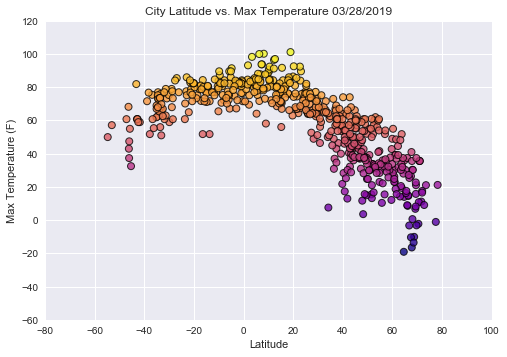

In [67]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(city_data["Lat"], 
            city_data["Max Temp"], c=city_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.datetime.now().strftime('%m/%d/%Y')}") 
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("data/Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

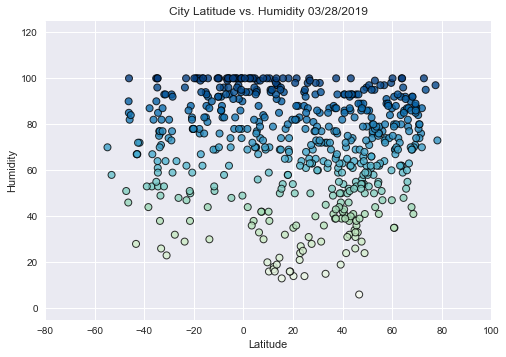

In [68]:
#Build a scatter plot for Latitude vs. Humidity

plt.scatter(city_data["Lat"], 
            city_data["Humidity"], c=city_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("data/Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

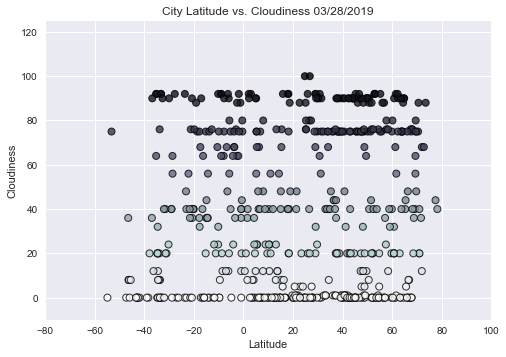

In [69]:
#Build a scatter plot for Latitude vs. Cloudiness

plt.scatter(city_data["Lat"], 
            city_data["Cloudiness"], c=city_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("data/Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

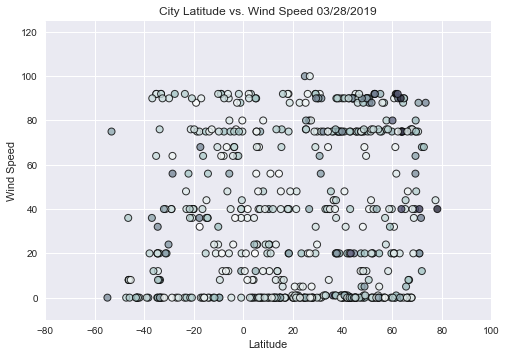

In [70]:
#Build a scatter plot for Latitude vs. Wind Speed

plt.scatter(city_data["Lat"], 
            city_data["Cloudiness"], c=city_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("data/Latitude_Wind_Speed.png")

# Show plot
plt.show()